
<br><br>

***

<br><br>


<center><font size="7" color="purple">Dates, Locators and Formatters</font></center>

<br><br>

***


<br><br><br><br>




### Table of Contents

* [datetime review](#datetime)
* [matplotlib.dates](#dates)
* [Format Dates](#formatdates)
* [Reference](#reference)



<br><br><br><br>

In [176]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import numpy as np 
import datetime
import pandas as pd

<br><br>

<font size="4" color="red">datetime Review</font><a class="anchor" id="datetime"></a>

<br><br>

In [177]:
now = datetime.datetime.now()        # class 'datetime.datetime

print("now as a datetime object: ", now)

date_time = now.strftime("%m/%d/%Y, %H:%M:%S")

print("now converted to string and formatted by strftime:",date_time)

newnow = datetime.datetime.strptime(now.strftime("%Y-%m-%d"), "%Y-%m-%d")  # formats must match

print("new now stripped of the time stamp:",newnow)

now as a datetime object:  2022-07-17 13:21:23.026416
now converted to string and formatted by strftime: 07/17/2022, 13:21:23
new now stripped of the time stamp: 2022-07-17 00:00:00


<br>

The timedelta function can take any or all of these

<pre>

                 timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)

</pre>



In [178]:
delta_year = datetime.timedelta(days = 365, hours=6)  # object is datetime.timedelta
print("A delta of 1 year: ", delta_year)

A delta of 1 year:  365 days, 6:00:00


In [179]:
print(newnow + delta_year)
print(newnow + 2 * delta_year)
print(newnow + 8 * delta_year)

2023-07-17 06:00:00
2024-07-16 12:00:00
2030-07-17 00:00:00


<br>

lets read in a series of dates and rates

<br>

In [180]:
file=r'C:\Users\arono\source\Reference\Jupyter\Plots\rates.csv'
rates_series=pd.read_csv(file)
d1 = min(rates_series.date)
d2 =  max(rates_series.date)
print("The minimum date is ", d1)
print("The maximum date is ", d2)
rates_series.head()

The minimum date is  1/10/2019
The maximum date is  9/9/2021


,date,rate
0,5/26/2022,0.78
1,5/25/2022,0.78
2,5/24/2022,0.78
3,5/23/2022,0.78
4,5/20/2022,0.78


In [181]:
rates_series =rates_series[::-1]   #reverse the sort...
rates_series.head()


,date,rate
1039,4/2/2018,1.80
1038,4/3/2018,1.83
1037,4/4/2018,1.74
1036,4/5/2018,1.75
1035,4/6/2018,1.75


<br><br>

<font size="4" color="red">matplotlib.dates Review</font><a class="anchor" id="dates"></a>

<br><br>

In [182]:
print(mpl.dates.datestr2num("1969-12-30"))
print(mpl.dates.datestr2num("1970-01-01"))
print(mpl.dates.datestr2num("1970-01-03"))

-2.0
0.0
2.0


<br>

matplotlib and datetime both use the <b><i>Gregorian Calendar</i></b> convention of using offsets from Jan 1 1970

<br>

the whole number or integer is the days after Jan 1 1970 and the fractional part or mantissa represents a fraction of the day.

<br>

For example, the number of days since 1970 is...

<br>

In [183]:
mpl.dates.datestr2num(now.strftime("%m/%d/%Y, %H:%M:%S"))

19190.556516203702

<br>

drange is another matplotlib function. It accepts datetimes but returns a numpy array of floats.  You have to pass a <b><i>datetime.timedelta</i></b> object so you cant specify the number of intervals.

<br>

In [184]:
dd1 = datetime.datetime.strptime(d1, "%m/%d/%Y")
dd2 = datetime.datetime.strptime(d2, "%m/%d/%Y")
range_years = mpl.dates.drange(dd1, dd2, delta_year)  # class 'numpy.ndarray' of floats
print("Here is the range", range_years)

Here is the range [17906.   18271.25 18636.5 ]


<br>

To actually see them, use num2date() to convert them to datetime, then use strftime to format them

<br>

In [185]:
for i in range(len(range_years)):
    print(datetime.datetime.strftime(mpl.dates.num2date(range_years[i]), "%m/%d/%Y"))

01/10/2019
01/10/2020
01/09/2021


<br>

To specify the number of intervals ... first get the total difference

<br>

In [186]:
dd_interval = dd2-dd1
dd_interval

datetime.timedelta(days=973)

<br>

now manually create a list of datetime objects

<br>

In [187]:
dd_sub_interval = dd_interval/4

four_dates = [dd1 + (i * dd_sub_interval) for i in range(1,5)] 

<br><br>

<font size="4" color="red">Format Dates</font><a class="anchor" id="formatdates"></a>

<br><br>

<br>

Format dates using set_major_locator and set_major_formatter. The minor_locator arranges smaller ticks without labels.

<br>

You want to make sure your intervals fit. If results are weird, tweak the intervals. Probably a good idea to define all locators up top...

<br>

In [188]:
hours_6_Loc = mpl.dates.HourLocator(interval=6)   # every 6 hours, will be the minor formatter, the small ticks
months_2_Loc = mpl.dates.MonthLocator(interval=2)         # every 2 months
months_3_Loc = mpl.dates.MonthLocator(interval=3)
yearsLoc = mpl.dates.YearLocator() 
monthsFmt = mpl.dates.DateFormatter('%B')           # October November December

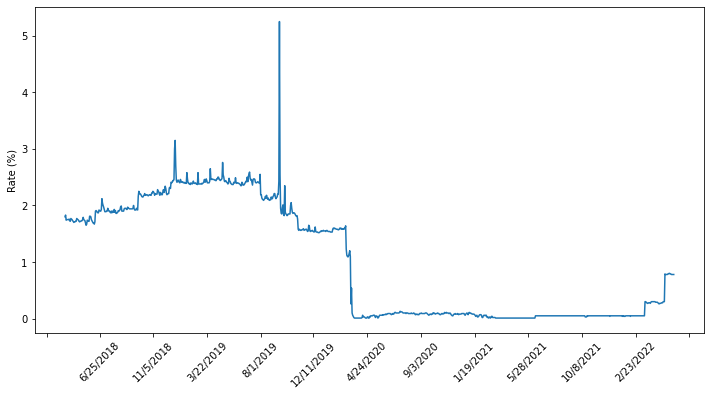

In [189]:
fig, ax = plt.subplots(figsize=(12, 6))

# doest seem to matter what order you call these..
ax.plot_date(rates_series.date,rates_series.rate, '-' )

ax.xaxis.set_major_locator(months_3_Loc) 

xFmt = mpl.dates.DateFormatter('%Y-%m')
ax.xaxis.set_minor_formatter(xFmt)           # setting it to major didnt come out right

ax.set(ylabel="Rate (%)", xlabel='')
plt.xticks(rotation = 45) 

plt.show()

<br>

Use AutoDateLocator() if your lazy

<br>

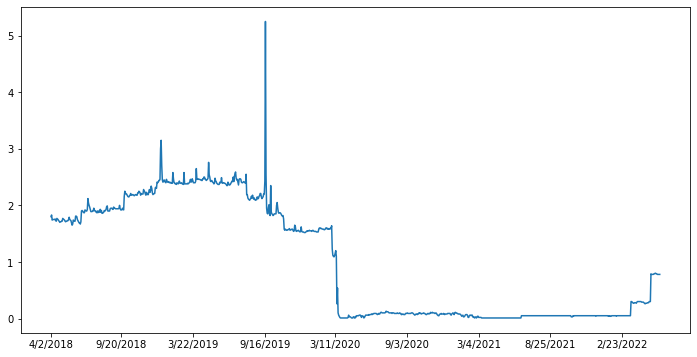

In [190]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.xaxis.set_major_locator(mpl.dates.AutoDateLocator())
ax.plot_date(rates_series.date,rates_series.rate, '-' )
plt.show()

<br>

Use NullLocator() if you dont want to see anything

<br>

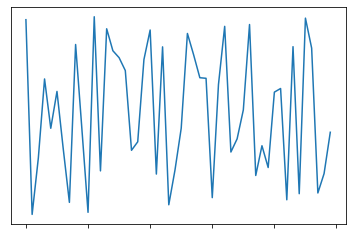

In [191]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

<br>

In this example we auto generate dates and values

<br>



We have  15  dates each 10 days apart 


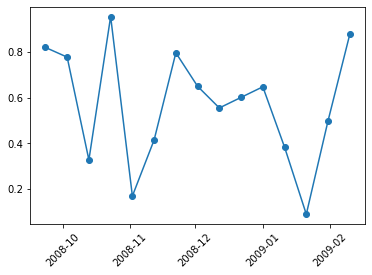

In [192]:
date1_1 = dt.datetime(2008, 9, 23)
date1_2 = dt.datetime(2009, 2, 16)
delta1 = dt.timedelta(days=10)
dates1 = mpl.dates.drange(date1_1, date1_2, delta1)
y1 = np.random.rand(len(dates1))

print("We have ", len(dates1), " dates each 10 days apart ")

dateFmt = mpl.dates.DateFormatter('%Y-%m')
monLoc = mpl.dates.MonthLocator()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot_date(dates1, y1, linestyle='-')
ax.xaxis.set_major_formatter(dateFmt)
ax.xaxis.set_major_locator(monLoc)

plt.xticks(rotation = 45) 
plt.show()

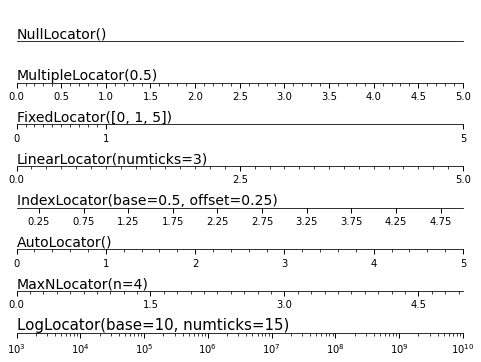

In [193]:

import matplotlib.ticker as ticker
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.patch.set_alpha(0.0)


plt.figure(figsize=(8, 6))
n = 8

# Null Locator
ax = plt.subplot(n, 1, 1)
setup(ax)
ax.xaxis.set_major_locator(ticker.NullLocator())
ax.xaxis.set_minor_locator(ticker.NullLocator())
ax.text(0.0, 0.1, "NullLocator()", fontsize=14, transform=ax.transAxes)

# Multiple Locator
ax = plt.subplot(n, 1, 2)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.text(0.0, 0.1, "MultipleLocator(0.5)", fontsize=14,
        transform=ax.transAxes)

# Fixed Locator
ax = plt.subplot(n, 1, 3)
setup(ax)
majors = [0, 1, 5]
ax.xaxis.set_major_locator(ticker.FixedLocator(majors))
minors = np.linspace(0, 1, 11)[1:-1]
ax.xaxis.set_minor_locator(ticker.FixedLocator(minors))
ax.text(0.0, 0.1, "FixedLocator([0, 1, 5])", fontsize=14,
        transform=ax.transAxes)

# Linear Locator
ax = plt.subplot(n, 1, 4)
setup(ax)
ax.xaxis.set_major_locator(ticker.LinearLocator(3))
ax.xaxis.set_minor_locator(ticker.LinearLocator(31))
ax.text(0.0, 0.1, "LinearLocator(numticks=3)",
        fontsize=14, transform=ax.transAxes)

# Index Locator
ax = plt.subplot(n, 1, 5)
setup(ax)
ax.plot(range(0, 5), [0]*5, color='White')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=.5, offset=.25))
ax.text(0.0, 0.1, "IndexLocator(base=0.5, offset=0.25)",
        fontsize=14, transform=ax.transAxes)

# Auto Locator
ax = plt.subplot(n, 1, 6)
setup(ax)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.text(0.0, 0.1, "AutoLocator()", fontsize=14, transform=ax.transAxes)

# MaxN Locator
ax = plt.subplot(n, 1, 7)
setup(ax)
ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(40))
ax.text(0.0, 0.1, "MaxNLocator(n=4)", fontsize=14, transform=ax.transAxes)

# Log Locator
ax = plt.subplot(n, 1, 8)
setup(ax)
ax.set_xlim(10**3, 10**10)
ax.set_xscale('log')
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
ax.text(0.0, 0.1, "LogLocator(base=10, numticks=15)",
        fontsize=15, transform=ax.transAxes)

plt.show()

<br><br>

<font size="5" color="maroon">Reference</font><a class="anchor" id="reference"></a>

<br><br>

tick locations and labels can be customized by setting the formatter and locator

<br><br>


<center><strong>Locators</strong></center>
<table border="1">
<colgroup>
<col width="30%" />
<col width="70%" />
</colgroup>
<thead>

<tr>
    <th>Locator Class</th>
    <th>Description</th>
</tr>
</thead>
    
<tbody>
<tr><td>NullLocator</td>
<td>No ticks</td>
</tr>
<tr><td>FixedLocator</td>
<td>Tick locations are fixed</td>
</tr>
<tr><td>IndexLocator</td>
<td>Locator for index plots (e.g., where x = range(len(y)))</td>
</tr>
<tr>
    <td>LinearLocator</td>
    <td>Evenly spaced from min to max</td>
</tr>
<tr>
    <td>LogLocator</td>
    <td>Logarithmically ticks from min to max</td>
</tr>
<tr>
    <td>MultipleLocator</td>
    <td>Ticks and range are a multiple of base</td>
</tr>
<tr>
    <td>MaxNLocator</td>
    <td>Finds N ticks at nice locations</td>
</tr>
</tbody>
</table>

<center><strong>Formatters</strong></center>
<table border="1">
<colgroup>
<col width="30%" />
<col width="70%" />
</colgroup>
<thead>

<tr>
    <th>Formatter Class</th>
    <th>Description</th>
</tr>
</thead>
    
<tbody>
<tr><td>NullFormatter</td>
<td>No labels</td>
</tr>
<tr><td>FixedFormatter</td>
<td>Set strings manually</td>
</tr>
<tr><td>IndexFormatter</td>
<td>Set from a list of labels</td>
</tr>
<tr>
    <td>FuncFormatter</td>
    <td>User-defined function sets the labels</td>
</tr>
<tr>
    <td>LogFormatter</td>
    <td>Default formatter for log axes</td>
</tr>
<tr>
    <td>FormatStrFormatter</td>
    <td>Use a format string for each value</td>
</tr>
<tr>
    <td>ScalarFormatter</td>
    <td>(Default) Formatter for scalar values</td>
</tr>
</tbody>
</table>

<center><strong>Format Codes</strong></center>
<table border="1">
<colgroup>
<col width="30%" />
<col width="70%" />
</colgroup>
<thead>

<tr>
    <th>Code</th>
    <th>Example</th>
</tr>
</thead>
    
<tbody>
<tr><td>%a</td>
<td>Sun</td>
</tr>
<tr><td>%A</td>
<td>Sunday</td>
</tr>

 <tr><td>%b</td>
<td>Sep</td>
</tr>
<tr><td>%B</td>
<td>September</td>
</tr>
    
    

<tr><td>%y</td>
<td>22</td>
</tr>
<tr><td>%Y</td>
<td>2022</td>
</tr>
    <tr><td>%d</td>
<td>08</td>
</tr>
    
</tbody>
</table>


<br>

DateFormatter and strftime use the same format codes. See [here](https://strftime.org/)

<br>

Here is a good [site](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/customize-dates-matplotlib-plots-python/)

